Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

# Bayesian Classification 

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with some standard imports:

In [1]:
import numpy as np # for matrix maths 
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns; sns.set() # for butiful plotting

%matplotlib inline

/home/sanidhya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sanidhya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Gaussian Naive Bayes 

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

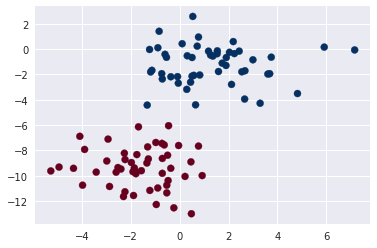

In [5]:
# importing blobs to make dataset
from sklearn.datasets import make_blobs

# data set 
X,y = make_blobs(100, 2, centers=2 , cluster_std=1.5, random_state=2)

# plotting the dataset 
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdBu',s=50);

This can be easily sorted or computed with the help of GaussianNB i.e. we can make an assumption that it is a gaussian distribution with no covariance and deviation 

Problem can be easily solved with the help of ``GaussianNB`` estimator in *Scikit-learn* module:

In [6]:
# importing GNB 
from sklearn.naive_bayes import GaussianNB

# making a model from GNB class 
model = GaussianNB()

# fitting data into model 
model.fit(X,y)

GaussianNB(priors=None)

Lets generate some new data points and predict them 

In [24]:
# making new data points 
rng = np.random.RandomState(0)

# new set of X 
Xnew = [-6,-14] + [14,18] * rng.rand(2000 , 2)

# predicting Xnew 
ynew = model.predict(Xnew)

Time to plot predicted data points 

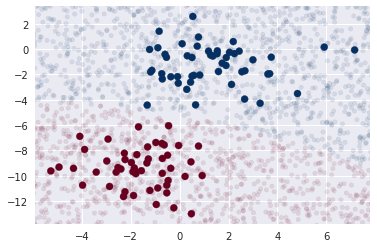

In [26]:
# scatter plot of training points 
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdBu',s=50)
lim = plt.axis() # axis of plt 

# predicted points scatter plot 
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu',alpha=0.1)
plt.axis(lim); # setting same limit for predcited plot 

A nice peice of bayesian learning is formation of formalism which can be done with the help of `predict_proba` feature:

In [27]:
yproba = model.predict_proba(Xnew)
yproba[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

This columns represent posterior probablities of the section that can be use to form and generate model.